In [37]:
import pandas as pd

resenha = pd.read_csv('imdb-reviews-pt-br.csv', sep=',')
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(resenha.text_pt,resenha.sentiment,random_state=42)

In [39]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

In [40]:
print('Negativa \n')
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [41]:
print('POSITIVO \n')
print(resenha.text_pt[40002])

POSITIVO 

Parece que deveria ser uma biografia de Claude Monet, mas na verdade é uma história altamente focada de relacionamentos entre três garotas adolescentes em uma equipe francesa de nado sincronizado. Não há pais ou professores para falar, nenhuma escola, e meninos são representados por uma figura periférica, o huno François, que entra na história determinado de tempos em tempos e sempre deixa confuso. Paul Aquart é o mais novo dos três, apenas aspirante. para se juntar ao time que ela tanto admira. Ela está parecendo estranha. Ela ainda não saiu do seu crescimento adolescente e tem membros longos e magros, pés grandes e nada de que falar. Ela é prognata e ostenta esses lábios gordos e franzidos. Depois de um tempo, sua aparência cresce em você e, de certos ângulos, ela pode parecer cativante. Adele Haenel é mais velha - mais, mais desenvolvida fisicamente. Que figura glamourosa ela corta seu traje de banho, passeando, provocando os garotos, balançando os longos cabelos loiros. 

In [42]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [43]:
classificacao = resenha["sentiment"].replace(['neg','pos'],['0','1'])

In [44]:
resenha['classificacao'] = classificacao
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [45]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Assisti um filme ótimo', 'Assisti um filme ruim']
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

In [46]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [47]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())

In [48]:
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [49]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [50]:
!pip install wordcloud

In [51]:
%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha.text_pt])
nuvem_palavras = WordCloud(width=800,height=500,
                          max_font_size=110,
                          collocations = False).generate(todas_palavras)

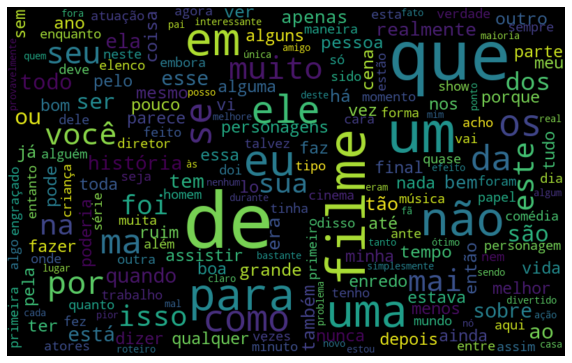

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.axis('off')
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.show()

In [53]:
resenha.classificacao.value_counts()

0    24765
1    24694
Name: classificacao, dtype: int64

In [54]:
negativo = resenha.query("sentiment == 'neg'")

In [55]:
negativo.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [56]:
positivo = resenha.query("sentiment == 'pos'")

In [57]:
positivo.head()

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1


In [58]:
todas_palavras_neg = ' '.join([texto for texto in negativo.text_pt])
nuvem_palavras_neg = WordCloud(width=800,height=500,
                          max_font_size=110,
                          collocations = False).generate(todas_palavras)

In [59]:
todas_palavras_pos = ' '.join([texto for texto in positivo.text_pt])
nuvem_palavras_pos = WordCloud(width=800,height=500,
                          max_font_size=110,
                          collocations = False).generate(todas_palavras)

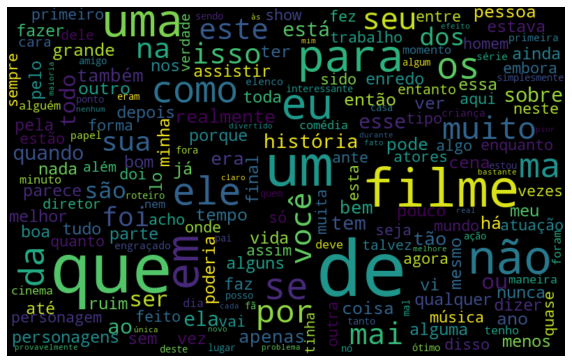

In [60]:
plt.figure(figsize=(10,7))
plt.axis('off')
plt.imshow(nuvem_palavras_neg, interpolation = 'bilinear')
plt.show()

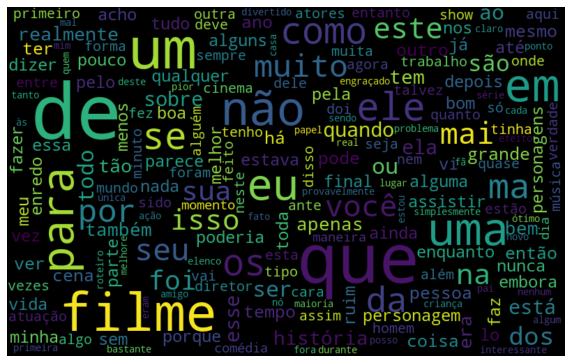

In [61]:
plt.figure(figsize=(10,7))
plt.axis('off')
plt.imshow(nuvem_palavras_pos, interpolation = 'bilinear')
plt.show()

In [62]:
!pip install -U nltk

Requirement already up-to-date: nltk in /home/kyo/anaconda3/lib/python3.7/site-packages (3.4.5)


In [63]:
import nltk

In [64]:
a = ["um filme ruim","um filme bom"]
frequencia = nltk.FreqDist()
frequencia

FreqDist({})

In [65]:
from nltk import tokenize

frase = 'Bem vindo ao mundo do PLN'

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']


In [66]:
token_frase_neg = token_espaco.tokenize(todas_palavras_neg)
frequencia_neg = nltk.FreqDist(token_frase_neg)

In [67]:
frequencia_neg

FreqDist({'de': 209113, 'que': 167678, 'e': 137200, 'o': 123049, 'um': 107492, 'a': 102794, 'é': 93327, 'não': 73713, 'uma': 64633, 'para': 64105, ...})

In [68]:
token_frase_pos = token_espaco.tokenize(todas_palavras_pos)
frequencia_pos = nltk.FreqDist(token_frase_pos)

In [69]:
frequencia_pos

FreqDist({'de': 208538, 'e': 162543, 'que': 157392, 'o': 121832, 'um': 108918, 'a': 107385, 'é': 99054, 'em': 68949, 'uma': 66255, 'para': 62451, ...})

In [70]:
df_freq_neg = pd.DataFrame({'Palavra':list(frequencia_neg.keys()), 'Frequência':list(frequencia_neg.values())})

In [73]:
df_freq_neg.nlargest(columns = 'frequencia', n=10)

KeyError: 'frequencia'

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax=sns.barplot(data = df_freq_neg.nlargest(columns='Frequência',n=10), x='Palavra', y='Frequência', color='blue')
ax.set(ylabel='Contagem')
plt.show()

In [ ]:
def pareto(texto,coluna_texto,quantidade) :
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    nuvem_palavras = WordCloud(width=800,height=500,
                          max_font_size=110,
                          collocations = False).generate(todas_palavras)
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()), 'Frequência':list(frequencia.values())})
    
    df_frequencia = df_frequencia.nlargest(columns='Frequência',n=quantidade)
    plt.figure(figsize=(12,8))
    ax=sns.barplot(data = df_frequencia, x='Palavra', y='Frequência', color='blue')
    ax.set(ylabel = 'contagem')
    plt.show
pareto(resenha,'text_pt',10)

In [ ]:
nltk.download('stopwords')
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
resenha['tratamento_1']=frase_processada


In [ ]:
resenha.head()

In [ ]:
classificar_texto(resenha,'tratamento_1','classificacao')

In [ ]:
pareto(resenha,'tratamento_1',10)